In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [3]:
df = pd.read_csv("SalaryData.csv")
df.head(10)

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769
5,Doctorate,Sales,219420
6,Doctorate,Sales,237920
7,Doctorate,Sales,160540
8,Doctorate,Sales,180934
9,Doctorate,Prof-specialty,248156


In [4]:
df['Education'].unique()

array([' Doctorate', ' Bachelors', ' HS-grad'], dtype=object)

In [5]:
df['Occupation'].unique()

array([' Adm-clerical', ' Sales', ' Prof-specialty', ' Exec-managerial'],
      dtype=object)

In [6]:
df.isna().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

### One-way Anova for Education:

Null Hypothesis, H0: The means of Salary for all the Educational levels are equal. 
Alternate Hypoyhesis, HA: Atleast one of the means of Salary for different Educational levels is different.

### One-way Anova for Occupation:

Null Hypothesis, H0: The means of Salary for different Occupation for Ingredient B are equal.
Alternate Hypoyhesis, HA: Atleast one of the means of Salary for different Occupation is different.

2.Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [8]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


Since the p value (1.257709e-08) is less 0.05, we can reject the null hupothesis.

3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [9]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


Since the p value (0.458508) is greater than the significance level, we fail to reject the null hupothesis or we can accept the null hypothesis

4. If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result.

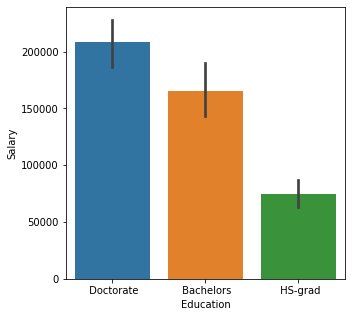

In [10]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x="Education",y='Salary',data=df)

What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

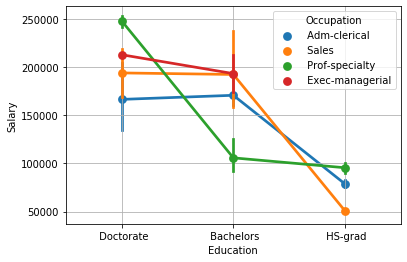

In [11]:
sns.pointplot(x = 'Education', y = 'Salary',hue='Occupation', data=df)
plt.grid()
plt.show()

Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

In [12]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  
